In [2]:
# Imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Import datasets

df_retail = pd.read_excel(r'C:\Users\JacyzinGuilherme(Bip\mentoria-bip\dados_editados\australia_retail.xlsx')
df_clima = pd.read_csv(r'C:\Users\JacyzinGuilherme(Bip\mentoria-bip\dados_editados\australia_clima_v3.csv')

In [4]:
# Verificando primeiras 5 linhas - df_retail

df_retail.head(5)

,tipo_negocio,loja_negocio,localidade,horario_abertura,horario_fechamento,horario_maior_fluxo,horario_pico_vendas,alocacao_funcionarios,horario_pico_vendas_2,vendas_medias_diarias,vendas_medias_semanais,produtos_populares,perfil_clientes,metodos_pagamento,satisfacao_clientes,lucratividade_loja,satisfacao_funcionarios,reclamacoes_trabalhistas
0,Clothing,Fashion Hub,Melbourne,09:00:00,20:00:00,19:00:00,16:00:00,Overstaffed,20:00:00,3520.77,23527.26,"T-shirts, Jeans",Young Adults,Credit Card,Good,Decreased,Dissatisfied,Yes
1,Bookstore,Book Nook,Brisbane,09:00:00,22:00:00,14:00:00,18:00:00,Understaffed,17:00:00,2915.36,27744.20,"Children's Books, Non-fiction",Teens,Credit Card,Good,Decreased,Dissatisfied,Yes
2,Bookstore,Book Nook,Adelaide,08:00:00,21:00:00,16:00:00,19:00:00,Overstaffed,18:00:00,1984.46,22411.88,"Non-fiction, Children's Books",Teens,Credit Card,Bad,Decreased,Satisfied,No
3,Bookstore,Book Nook,Melbourne,09:00:00,18:00:00,18:00:00,19:00:00,Overstaffed,19:00:00,644.22,31314.84,"Fiction, Non-fiction",Teens,Digital Wallet,Bad,Decreased,Dissatisfied,Yes
4,Furniture,Home Essentials,Sydney,07:00:00,20:00:00,15:00:00,21:00:00,Understaffed,18:00:00,620.63,27881.23,"Chairs, Sofas",Seniors,Cash,Good,Increased,Satisfied,No


In [5]:
# Tamanho de retail

df_retail.shape

(500, 18)

In [6]:
# Infos gerais df_retail

df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tipo_negocio              500 non-null    object 
 1   loja_negocio              500 non-null    object 
 2   localidade                500 non-null    object 
 3   horario_abertura          500 non-null    object 
 4   horario_fechamento        500 non-null    object 
 5   horario_maior_fluxo       500 non-null    object 
 6   horario_pico_vendas       500 non-null    object 
 7   alocacao_funcionarios     500 non-null    object 
 8   horario_pico_vendas_2     500 non-null    object 
 9   vendas_medias_diarias     500 non-null    float64
 10  vendas_medias_semanais    500 non-null    float64
 11  produtos_populares        500 non-null    object 
 12  perfil_clientes           500 non-null    object 
 13  metodos_pagamento         500 non-null    object 
 14  satisfacao

In [7]:
# Verificando valores nulos de df_retail

df_retail.isna().sum()

tipo_negocio                0
loja_negocio                0
localidade                  0
horario_abertura            0
horario_fechamento          0
horario_maior_fluxo         0
horario_pico_vendas         0
alocacao_funcionarios       0
horario_pico_vendas_2       0
vendas_medias_diarias       0
vendas_medias_semanais      0
produtos_populares          0
perfil_clientes             0
metodos_pagamento           0
satisfacao_clientes         0
lucratividade_loja          0
satisfacao_funcionarios     0
reclamacoes_trabalhistas    0
dtype: int64

In [8]:
# Verificando primeiras 5 linhas - df_clima

df_clima.head(5)

,data,localidade,temp_min,temp_max,chuva_mm,evaporacao,horas_sol,vento_rajada_direcao,vento_rajada_velocidade,vento_direcao_9h,...,cluster_temp_9h,cluster_temp_15h,cluster_umidade_9h,cluster_umidade_15h,cluster_chuva_mm,cluster_rajada_vento,cluster_hora_sol,cluster_pressao_at_9h,cluster_pressao_at_15h,cluster_nuvem_9h
0,2010-10-08,Sydney,13.8,19.5,0.0,4.6,9.5,ESE,35.0,NNE,...,ameno,ameno,tropical,ameno,seco,moderado,muitas horas de sol,normal,normal,parcialmente nublado
1,2010-10-11,Sydney,16.5,21.1,1.2,6.2,6.6,ENE,56.0,NE,...,ameno,quente,ameno,ameno,seco,forte,médias horas de sol,normal,normal,parcialmente nublado
2,2010-10-12,Sydney,16.4,21.8,1.0,6.0,5.9,NNE,50.0,NNE,...,ameno,quente,tropical,ameno,seco,forte,médias horas de sol,normal,normal,parcialmente nublado
3,2010-10-13,Sydney,16.7,23.9,0.4,7.0,2.8,NNE,39.0,W,...,ameno,quente,tropical,ameno,seco,moderado,poucas horas de sol,normal,normal,parcialmente nublado
4,2010-10-14,Sydney,17.8,28.9,2.0,4.0,10.8,NNW,41.0,NNW,...,quente,quente,ameno,ameno,seco,forte,muitas horas de sol,normal,baixa,parcialmente nublado


In [9]:
# Tamanho de df_clima

df_clima.shape

(13349, 38)

In [10]:
# Infos gerais df_retail

df_clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13349 entries, 0 to 13348
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   data                     13349 non-null  object 
 1   localidade               13349 non-null  object 
 2   temp_min                 13349 non-null  float64
 3   temp_max                 13349 non-null  float64
 4   chuva_mm                 13349 non-null  float64
 5   evaporacao               13349 non-null  float64
 6   horas_sol                13349 non-null  float64
 7   vento_rajada_direcao     13349 non-null  object 
 8   vento_rajada_velocidade  13349 non-null  float64
 9   vento_direcao_9h         13349 non-null  object 
 10  vento_direcao_15h        13349 non-null  object 
 11  vento_veloc_9h           13349 non-null  float64
 12  vento_veloc_15h          13349 non-null  float64
 13  umidade_9h               13349 non-null  float64
 14  umidade_15h           

In [11]:
# Verificando valores nulos de df_retail

df_clima.isna().sum()

data                       0
localidade                 0
temp_min                   0
temp_max                   0
chuva_mm                   0
evaporacao                 0
horas_sol                  0
vento_rajada_direcao       0
vento_rajada_velocidade    0
vento_direcao_9h           0
vento_direcao_15h          0
vento_veloc_9h             0
vento_veloc_15h            0
umidade_9h                 0
umidade_15h                0
pressao_9h                 0
pressao_15h                0
nuvem_9h                   0
nuvem_15h                  0
temp_9h                    0
temp_15h                   0
choveu_hoje                0
chove_amanha               0
ano                        0
mes                        0
dia                        0
cluster_temp_min           0
cluster_temp_max           0
cluster_temp_9h            0
cluster_temp_15h           0
cluster_umidade_9h         0
cluster_umidade_15h        0
cluster_chuva_mm           0
cluster_rajada_vento       0
cluster_hora_s

In [12]:
display(df_clima), display(df_retail)

,data,localidade,temp_min,temp_max,chuva_mm,evaporacao,horas_sol,vento_rajada_direcao,vento_rajada_velocidade,vento_direcao_9h,...,cluster_temp_9h,cluster_temp_15h,cluster_umidade_9h,cluster_umidade_15h,cluster_chuva_mm,cluster_rajada_vento,cluster_hora_sol,cluster_pressao_at_9h,cluster_pressao_at_15h,cluster_nuvem_9h
0,2010-10-08,Sydney,13.8,19.5,0.0,4.6,9.5,ESE,35.0,NNE,...,ameno,ameno,tropical,ameno,seco,moderado,muitas horas de sol,normal,normal,parcialmente nublado
1,2010-10-11,Sydney,16.5,21.1,1.2,6.2,6.6,ENE,56.0,NE,...,ameno,quente,ameno,ameno,seco,forte,médias horas de sol,normal,normal,parcialmente nublado
2,2010-10-12,Sydney,16.4,21.8,1.0,6.0,5.9,NNE,50.0,NNE,...,ameno,quente,tropical,ameno,seco,forte,médias horas de sol,normal,normal,parcialmente nublado
3,2010-10-13,Sydney,16.7,23.9,0.4,7.0,2.8,NNE,39.0,W,...,ameno,quente,tropical,ameno,seco,moderado,poucas horas de sol,normal,normal,parcialmente nublado
4,2010-10-14,Sydney,17.8,28.9,2.0,4.0,10.8,NNW,41.0,NNW,...,quente,quente,ameno,ameno,seco,forte,muitas horas de sol,normal,baixa,parcialmente nublado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13344,2017-06-21,Perth,10.3,19.9,0.2,1.8,7.5,NW,37.0,NNE,...,ameno,ameno,tropical,ameno,seco,moderado,médias horas de sol,normal,normal,parcialmente nublado
13345,2017-06-22,Perth,13.0,16.8,61.2,3.6,0.0,SSW,46.0,W,...,ameno,ameno,tropical,tropical,extrema,forte,poucas horas de sol,baixa,baixa,parcialmente nublado
13346,2017-06-23,Perth,13.3,18.9,0.4,1.8,6.5,SE,37.0,SE,...,ameno,ameno,tropical,ameno,seco,moderado,médias horas de sol,alta,alta,parcialmente nublado
13347,2017-06-24,Perth,11.5,18.2,0.0,3.8,9.3,SE,30.0,ESE,...,ameno,ameno,ameno,ameno,seco,moderado,muitas horas de sol,alta,alta,parcialmente nublado


,tipo_negocio,loja_negocio,localidade,horario_abertura,horario_fechamento,horario_maior_fluxo,horario_pico_vendas,alocacao_funcionarios,horario_pico_vendas_2,vendas_medias_diarias,vendas_medias_semanais,produtos_populares,perfil_clientes,metodos_pagamento,satisfacao_clientes,lucratividade_loja,satisfacao_funcionarios,reclamacoes_trabalhistas
0,Clothing,Fashion Hub,Melbourne,09:00:00,20:00:00,19:00:00,16:00:00,Overstaffed,20:00:00,3520.77,23527.26,"T-shirts, Jeans",Young Adults,Credit Card,Good,Decreased,Dissatisfied,Yes
1,Bookstore,Book Nook,Brisbane,09:00:00,22:00:00,14:00:00,18:00:00,Understaffed,17:00:00,2915.36,27744.20,"Children's Books, Non-fiction",Teens,Credit Card,Good,Decreased,Dissatisfied,Yes
2,Bookstore,Book Nook,Adelaide,08:00:00,21:00:00,16:00:00,19:00:00,Overstaffed,18:00:00,1984.46,22411.88,"Non-fiction, Children's Books",Teens,Credit Card,Bad,Decreased,Satisfied,No
3,Bookstore,Book Nook,Melbourne,09:00:00,18:00:00,18:00:00,19:00:00,Overstaffed,19:00:00,644.22,31314.84,"Fiction, Non-fiction",Teens,Digital Wallet,Bad,Decreased,Dissatisfied,Yes
4,Furniture,Home Essentials,Sydney,07:00:00,20:00:00,15:00:00,21:00:00,Understaffed,18:00:00,620.63,27881.23,"Chairs, Sofas",Seniors,Cash,Good,Increased,Satisfied,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Clothing,Fashion Hub,Melbourne,07:00:00,20:00:00,18:00:00,17:00:00,Overstaffed,20:00:00,507.56,5081.61,"Dresses, Jeans",Young Adults,Digital Wallet,Good,Increased,Satisfied,No
496,Grocery,Green Grocers,Sydney,08:00:00,18:00:00,11:00:00,17:00:00,Understaffed,17:00:00,3618.03,29709.42,"Vegetables, Dairy Products",Families,Debit Card,Bad,Increased,Satisfied,Yes
497,Clothing,Fashion Hub,Perth,07:00:00,21:00:00,12:00:00,20:00:00,Overstaffed,20:00:00,1569.51,9908.53,"Dresses, Jeans",Young Adults,Digital Wallet,Good,Increased,Dissatisfied,No
498,Clothing,Fashion Hub,Sydney,08:00:00,19:00:00,20:00:00,17:00:00,Understaffed,19:00:00,1411.71,33851.77,"T-shirts, Jeans",Young Adults,Credit Card,Good,Increased,Dissatisfied,Yes


(None, None)

In [13]:
# Cidades / Localidades com maior resultado de venda média diária

vendas_por_cidade = df_retail.groupby('localidade')['vendas_medias_diarias'].mean().rename('vendas_medias_diarias')
display(vendas_por_cidade.round(2).sort_values(ascending=False))

localidade
Sydney       3068.43
Brisbane     2898.42
Melbourne    2687.14
Adelaide     2505.73
Perth        2459.98
Name: vendas_medias_diarias, dtype: float64

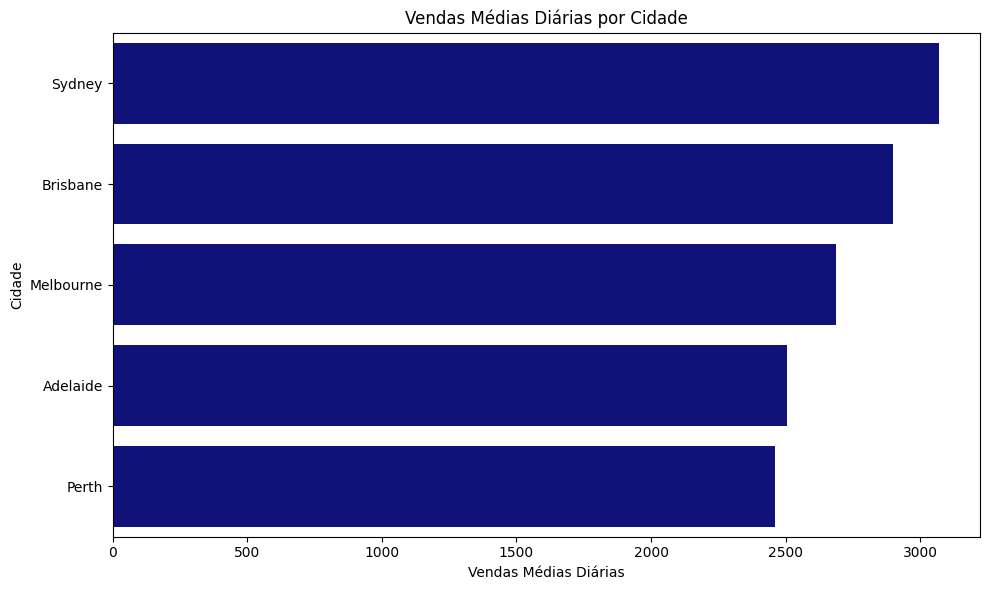

In [14]:
# Gráfico

# Ordenação de dados

vendas_por_cidade_ord = vendas_por_cidade.sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=vendas_por_cidade_ord, x='vendas_medias_diarias', y='localidade', color='darkblue')

plt.title('Vendas Médias Diárias por Cidade')
plt.xlabel('Vendas Médias Diárias')
plt.ylabel('Cidade')

plt.tight_layout()
plt.show()

In [15]:
# Tipo de Negócio e Loja - resultados de vendas

vendas_tipo_negocio = df_retail.groupby(['tipo_negocio', 'loja_negocio'], as_index=False).agg(vendas_medias_diarias = ('vendas_medias_diarias', 'mean'), vendas_minimas=('vendas_medias_diarias', 'min'), vendas_maximas=('vendas_medias_diarias', 'max')).sort_values(by='vendas_medias_diarias', ascending=False)
display(vendas_tipo_negocio.round(2))

,tipo_negocio,loja_negocio,vendas_medias_diarias,vendas_minimas,vendas_maximas
2,Electronics,Tech Store,3179.99,753.05,5199.46
4,Grocery,Green Grocers,2942.67,1646.03,4397.82
1,Clothing,Fashion Hub,2673.30,494.54,4611.38
3,Furniture,Home Essentials,2584.94,595.51,5103.27
0,Bookstore,Book Nook,2470.30,567.18,4045.92


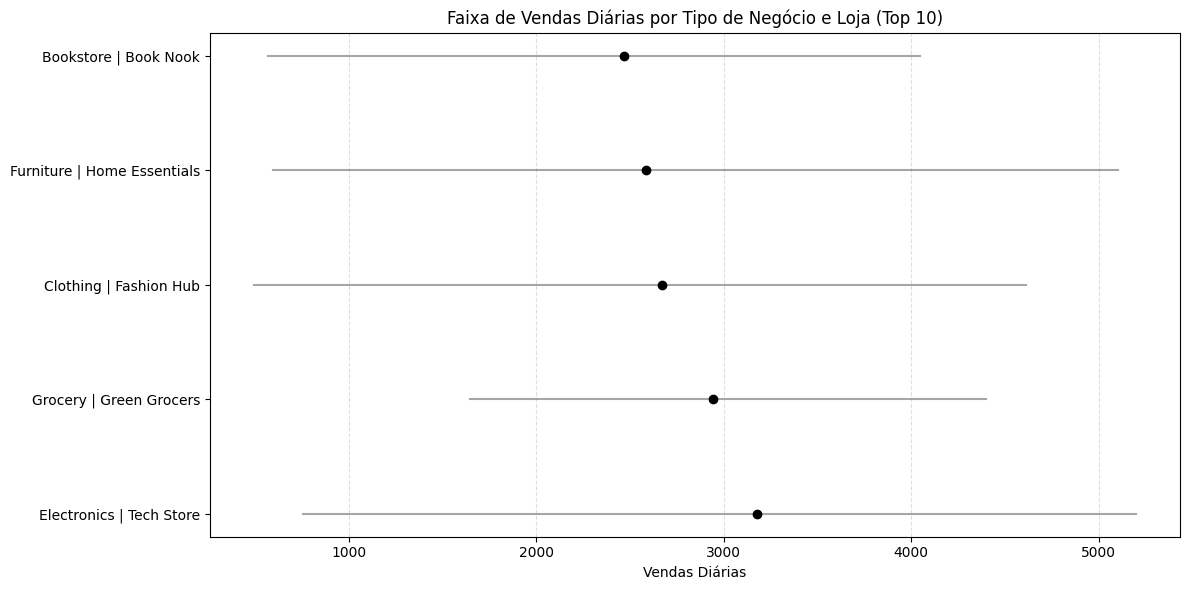

In [16]:
# Gráfico

# selecionar top 10 lojas por média
top10 = vendas_tipo_negocio.head(10).reset_index(drop=True)

plt.figure(figsize=(12, 6))

for i, row in top10.iterrows():
    plt.plot(
        [row['vendas_minimas'], row['vendas_maximas']],
        [i, i],
        color='gray',
        alpha=0.7
    )
    plt.scatter(
        row['vendas_medias_diarias'],
        i,
        color='black',
        zorder=3
    )

plt.yticks(
    range(len(top10)),
    top10['tipo_negocio'] + ' | ' + top10['loja_negocio']
)

plt.xlabel('Vendas Diárias')
plt.title('Faixa de Vendas Diárias por Tipo de Negócio e Loja (Top 10)')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [17]:
# Tipo de Negócio, Loja e Localidade - resultado de vendas

vendas_tipo_negocio = df_retail.groupby(['tipo_negocio', 'loja_negocio', 'localidade'], as_index=False).agg(vendas_medias_diarias = ('vendas_medias_diarias', 'mean'), vendas_minimas=('vendas_medias_diarias', 'min'), vendas_maximas=('vendas_medias_diarias', 'max')).sort_values(by='vendas_medias_diarias', ascending=False)
display(vendas_tipo_negocio.round(2))

,tipo_negocio,loja_negocio,localidade,vendas_medias_diarias,vendas_minimas,vendas_maximas
17,Furniture,Home Essentials,Melbourne,4748.96,4431.54,5103.27
11,Electronics,Tech Store,Brisbane,4283.00,3636.12,4957.99
14,Electronics,Tech Store,Sydney,4236.84,3292.47,5199.46
22,Grocery,Green Grocers,Sydney,4057.80,3618.03,4397.82
12,Electronics,Tech Store,Melbourne,3360.96,3100.30,3756.60
13,Electronics,Tech Store,Perth,3218.90,2107.05,4093.49
4,Bookstore,Book Nook,Sydney,3209.25,2367.51,4011.80
5,Clothing,Fashion Hub,Adelaide,3192.51,1959.25,4574.39
20,Grocery,Green Grocers,Brisbane,2958.54,2259.06,3916.35
15,Furniture,Home Essentials,Adelaide,2837.37,921.69,4093.87


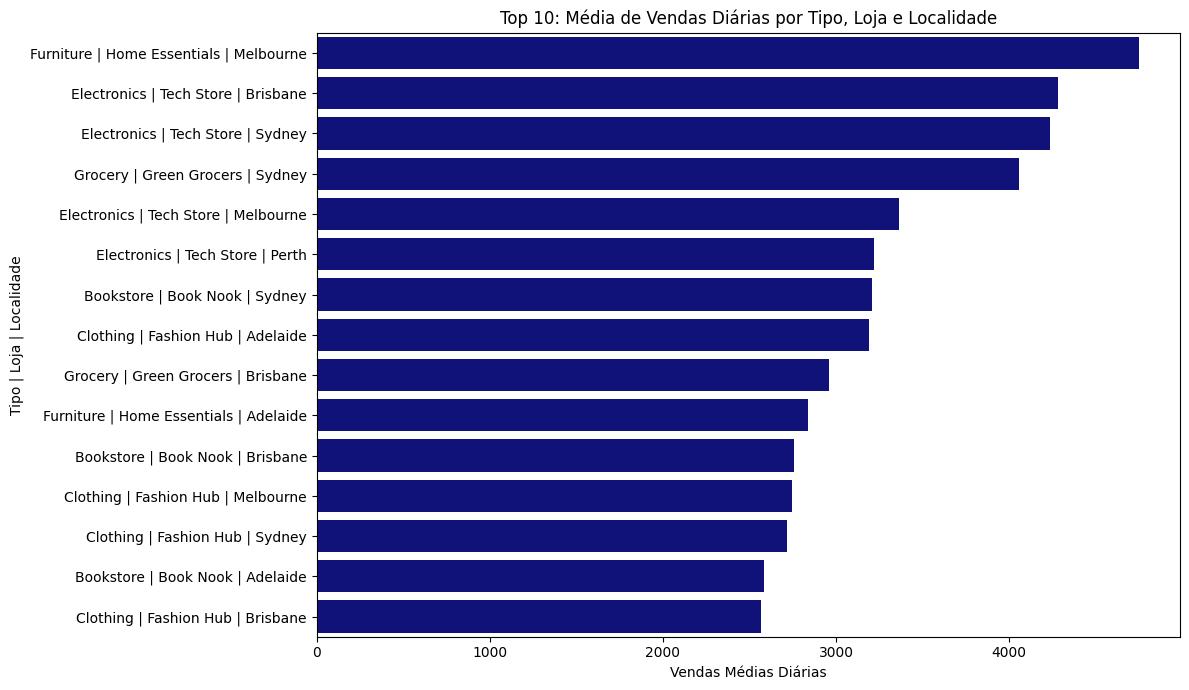

In [50]:
# Gráfico

top10 = vendas_tipo_negocio.head(15).copy()
top10['grupo'] = top10['tipo_negocio'] + ' | ' + top10['loja_negocio'] + ' | ' + top10['localidade']

plt.figure(figsize=(12, 7))
sns.barplot(data=top10, x='vendas_medias_diarias', y='grupo', color='darkblue')

plt.title('Top 10: Média de Vendas Diárias por Tipo, Loja e Localidade')
plt.xlabel('Vendas Médias Diárias')
plt.ylabel('Tipo | Loja | Localidade')
plt.tight_layout()
plt.show()

In [19]:
# Loja - Negócio com maior resultado de venda média diária

vendas_loja = df_retail.groupby('loja_negocio')['vendas_medias_diarias'].mean().rename('vendas_medias_diarias')
display(vendas_loja.round(2).sort_values(ascending=False))

loja_negocio
Tech Store         3179.99
Green Grocers      2942.67
Fashion Hub        2673.30
Home Essentials    2584.94
Book Nook          2470.30
Name: vendas_medias_diarias, dtype: float64

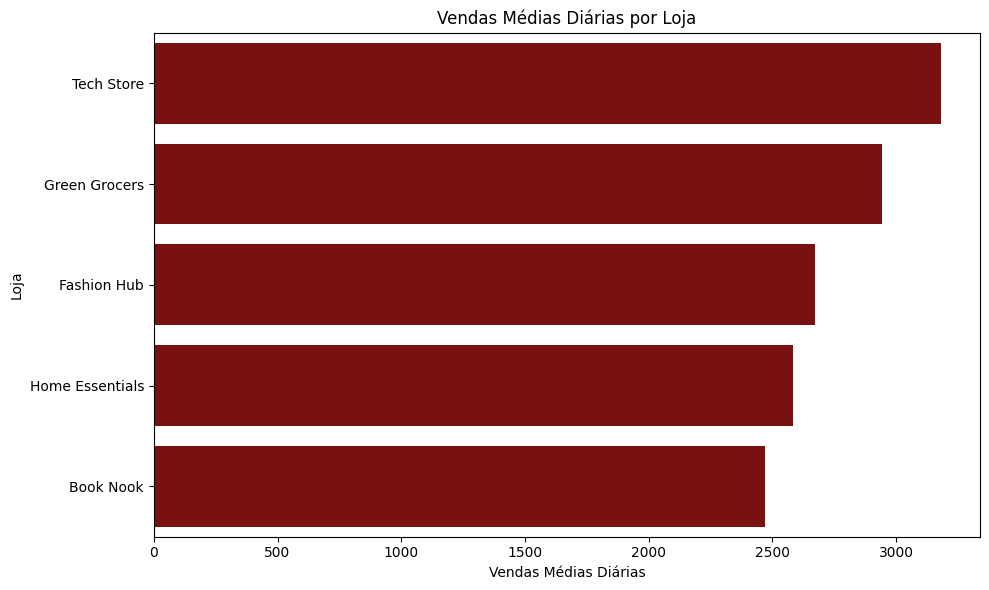

In [51]:
# Gráfico

vendas_loja = df_retail.groupby('loja_negocio')['vendas_medias_diarias'].mean()
vendas_loja.name = 'vendas_medias_diarias'

vendas_loja_ord = vendas_loja.sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=vendas_loja_ord, x='vendas_medias_diarias', y='loja_negocio', color='darkred')

plt.title('Vendas Médias Diárias por Loja')
plt.xlabel('Vendas Médias Diárias')
plt.ylabel('Loja')
plt.tight_layout()
plt.show()

In [21]:
# Vendas médias diárias por produto e por localidade

var_produto_localidade = df_retail.groupby(['localidade', 'produtos_populares'], as_index=False).agg(vendas_medias_diarias = ('vendas_medias_diarias', 'mean'), vendas_minimas=('vendas_medias_diarias', 'min'), vendas_maximas=('vendas_medias_diarias', 'max')).sort_values(by='vendas_medias_diarias', ascending=False)
display(var_produto_localidade.round(2))

,localidade,produtos_populares,vendas_medias_diarias,vendas_minimas,vendas_maximas
36,Sydney,"Headphones, Smartphones",4815.48,4395.77,5199.46
24,Melbourne,"Tables, Chairs",4748.96,4431.54,5103.27
15,Brisbane,"Headphones, Laptops",4568.67,4201.80,4957.99
38,Sydney,"Jeans, T-shirts",4239.51,4079.83,4611.38
8,Adelaide,"T-shirts, Jeans",4232.42,3861.50,4574.39
43,Sydney,"Vegetables, Dairy Products",4057.80,3618.03,4397.82
17,Brisbane,"Laptops, Headphones",3997.33,3636.12,4380.72
0,Adelaide,"Chairs, Sofas",3833.88,3519.04,4093.87
23,Melbourne,"T-shirts, Jeans",3738.28,3520.77,3960.08
39,Sydney,"Non-fiction, Fiction",3730.35,3458.06,4011.80


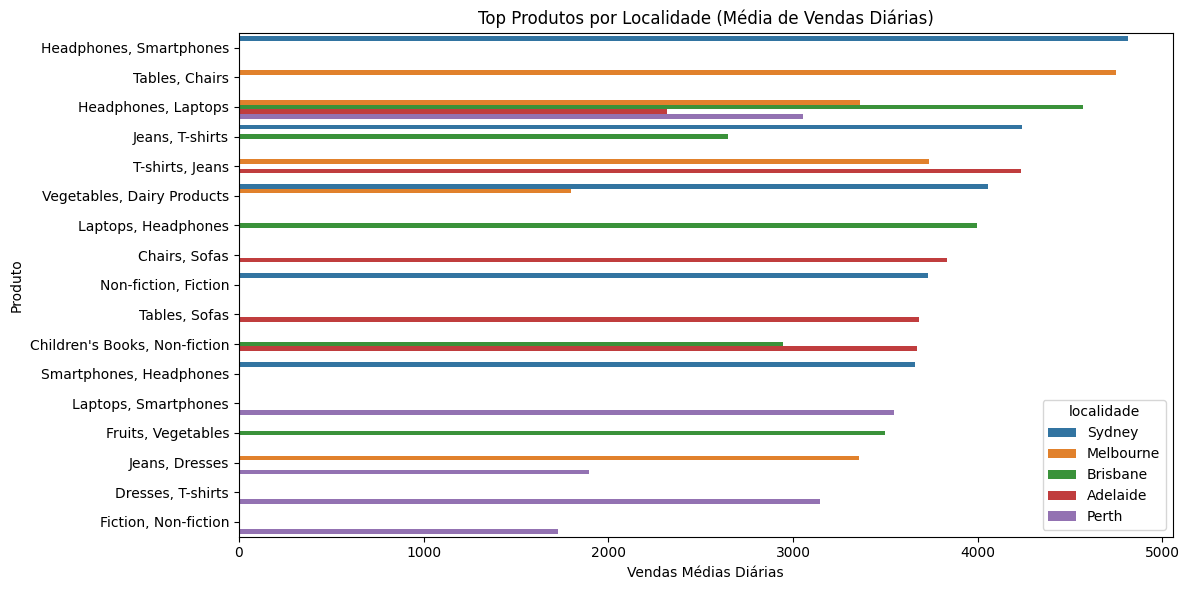

In [22]:
# Gráfico

# Top 5 produtos por localidade
top_produtos = (var_produto_localidade.groupby('localidade', group_keys=False).head(5))

plt.figure(figsize=(12, 6))
sns.barplot(data=top_produtos, x='vendas_medias_diarias', y='produtos_populares', hue='localidade')

plt.title('Top Produtos por Localidade (Média de Vendas Diárias)')
plt.xlabel('Vendas Médias Diárias')
plt.ylabel('Produto')
plt.tight_layout()
plt.show()

In [23]:
# Vendas médias diárias por produto e perfil de público

vendas_perfilCliente_localidade = df_retail.groupby(['localidade', 'perfil_clientes'], as_index=False).agg(vendas_medias_diarias = ('vendas_medias_diarias', 'mean'), vendas_minimas=('vendas_medias_diarias', 'min'), vendas_maximas=('vendas_medias_diarias', 'max')).sort_values(by='vendas_medias_diarias', ascending=False)
display(vendas_perfilCliente_localidade.round(2))

,localidade,perfil_clientes,vendas_medias_diarias,vendas_minimas,vendas_maximas
11,Melbourne,Seniors,4748.96,4431.54,5103.27
5,Brisbane,Professionals,4283.00,3636.12,4957.99
19,Sydney,Professionals,4236.84,3292.47,5199.46
18,Sydney,Families,4057.80,3618.03,4397.82
10,Melbourne,Professionals,3360.96,3100.30,3756.60
14,Perth,Professionals,3218.90,2107.05,4093.49
21,Sydney,Teens,3209.25,2367.51,4011.80
3,Adelaide,Young Adults,3192.51,1959.25,4574.39
4,Brisbane,Families,2958.54,2259.06,3916.35
1,Adelaide,Seniors,2837.37,921.69,4093.87


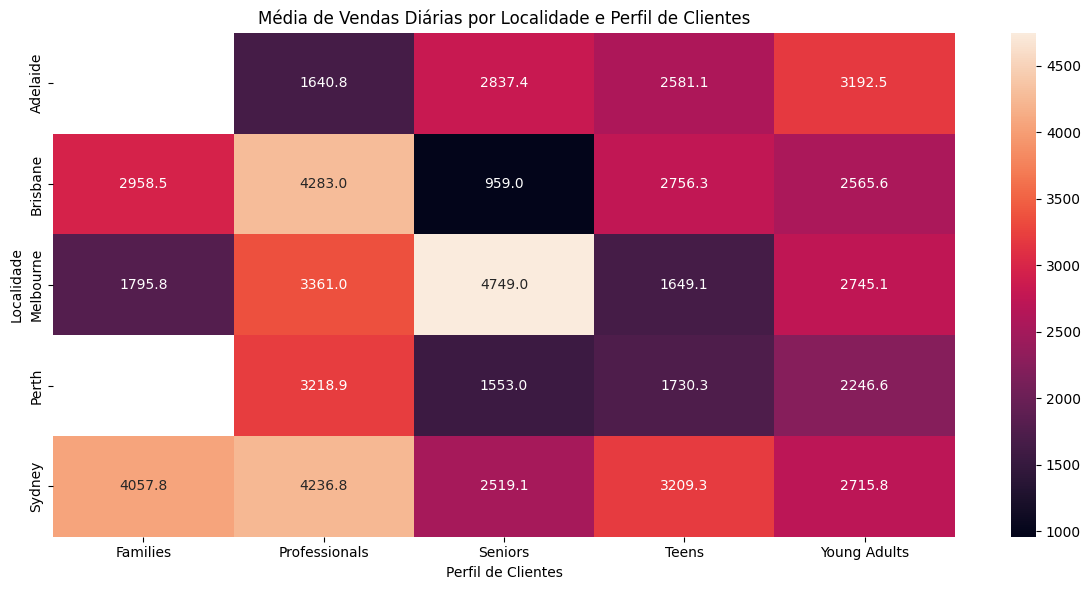

In [24]:
# Gráfico

# pivot: linhas = localidade, colunas = perfil, valores = média
pivot_perfil = vendas_perfilCliente_localidade.pivot_table(
    index='localidade',
    columns='perfil_clientes',
    values='vendas_medias_diarias',
    aggfunc='mean'
)

plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot_perfil,
    annot=True,
    fmt='.1f'
)

plt.title('Média de Vendas Diárias por Localidade e Perfil de Clientes')
plt.xlabel('Perfil de Clientes')
plt.ylabel('Localidade')
plt.tight_layout()
plt.show()

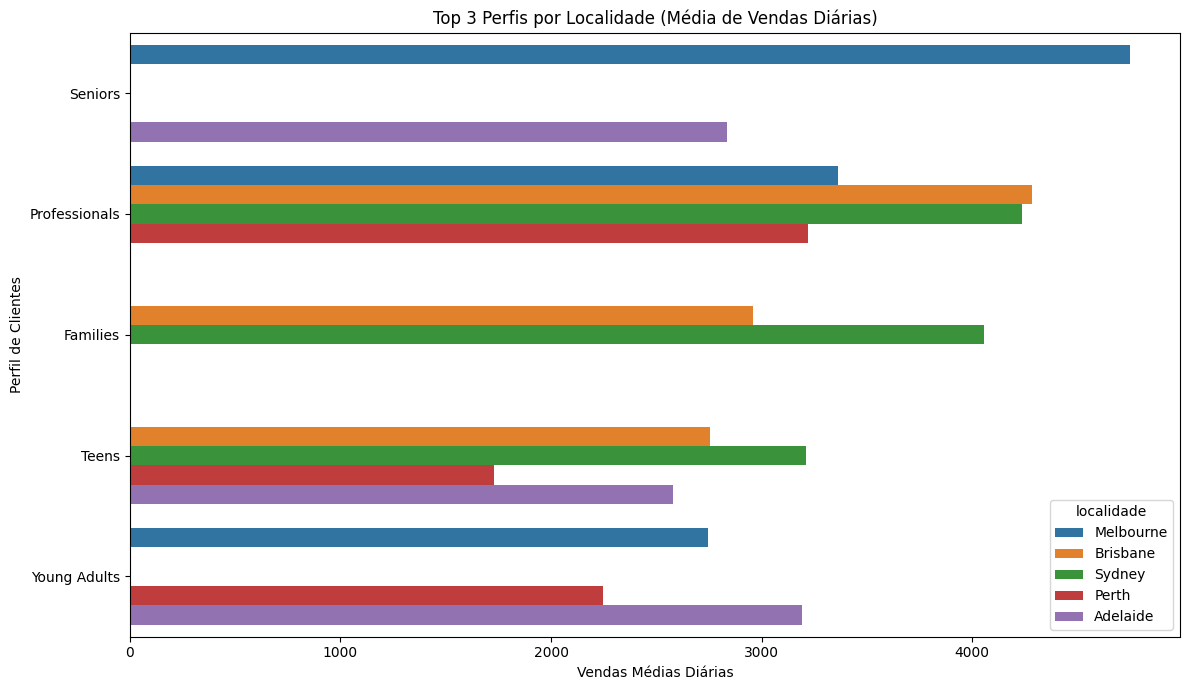

In [25]:
top3_perfis = (vendas_perfilCliente_localidade.groupby('localidade', group_keys=False).head(3).copy())

plt.figure(figsize=(12, 7))
sns.barplot(data=top3_perfis, x='vendas_medias_diarias', y='perfil_clientes', hue='localidade')

plt.title('Top 3 Perfis por Localidade (Média de Vendas Diárias)')
plt.xlabel('Vendas Médias Diárias')
plt.ylabel('Perfil de Clientes')
plt.tight_layout()
plt.show()

In [26]:
# Perfil de clientes por produto vs vendas 

vendas_perfilCliente_produtos = df_retail.groupby(['perfil_clientes', 'produtos_populares'], as_index=False).agg(vendas_medias_diarias = ('vendas_medias_diarias', 'mean'), vendas_minimas=('vendas_medias_diarias', 'min'), vendas_maximas=('vendas_medias_diarias', 'max')).sort_values(by='vendas_medias_diarias', ascending=False)
display(vendas_perfilCliente_produtos.round(2))

,perfil_clientes,produtos_populares,vendas_medias_diarias,vendas_minimas,vendas_maximas
5,Professionals,"Laptops, Headphones",3997.33,3636.12,4380.72
17,Teens,"Non-fiction, Fiction",3730.35,3458.06,4011.80
12,Seniors,"Tables, Sofas",3682.23,3369.75,3935.76
7,Professionals,"Smartphones, Headphones",3658.19,3292.47,3902.58
6,Professionals,"Laptops, Smartphones",3548.38,3264.17,3760.94
1,Families,"Fruits, Vegetables",3498.79,3281.77,3916.35
21,Young Adults,"Jeans, T-shirts",3445.13,2462.56,4611.38
11,Seniors,"Tables, Chairs",3428.79,1902.62,5103.27
13,Teens,"Children's Books, Non-fiction",3308.91,2709.91,4045.92
3,Professionals,"Headphones, Laptops",3271.37,2107.05,4957.99


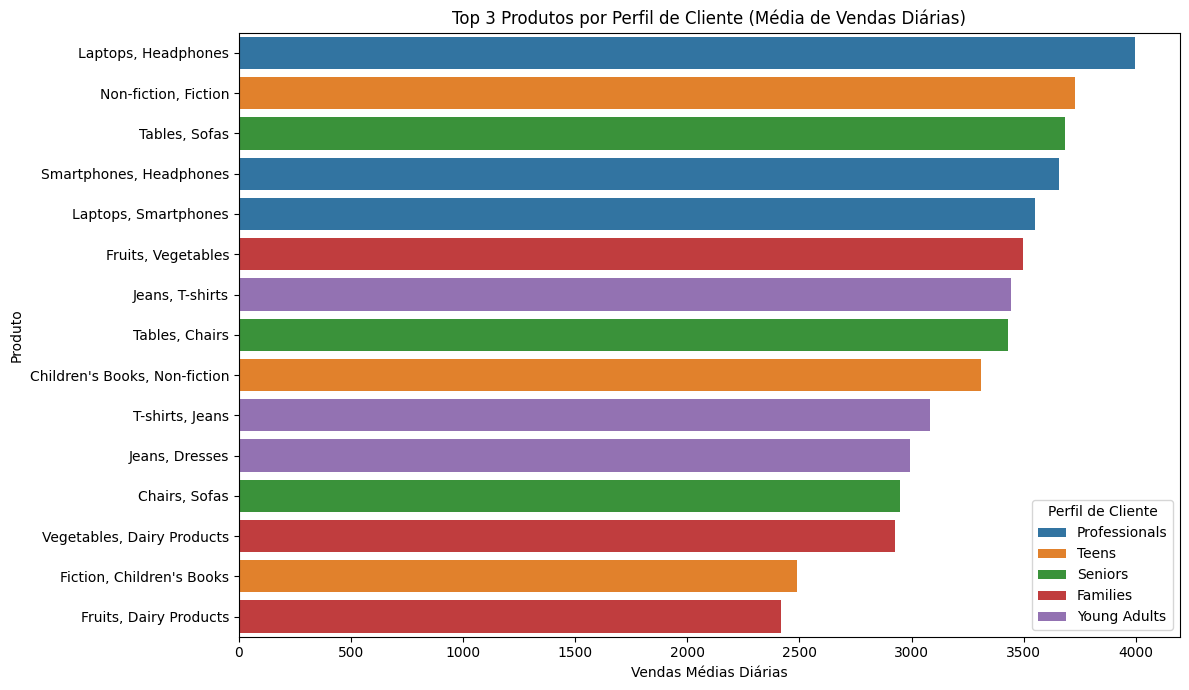

In [27]:
# Gráfico

# Selecionar Top 3 produtos por perfil
top_produtos_perfil = (vendas_perfilCliente_produtos.groupby('perfil_clientes', group_keys=False).head(3).copy())

plt.figure(figsize=(12, 7))
sns.barplot(data=top_produtos_perfil, x='vendas_medias_diarias', y='produtos_populares', hue='perfil_clientes')

plt.title('Top 3 Produtos por Perfil de Cliente (Média de Vendas Diárias)')
plt.xlabel('Vendas Médias Diárias')
plt.ylabel('Produto')
plt.legend(title='Perfil de Cliente')
plt.tight_layout()
plt.show()

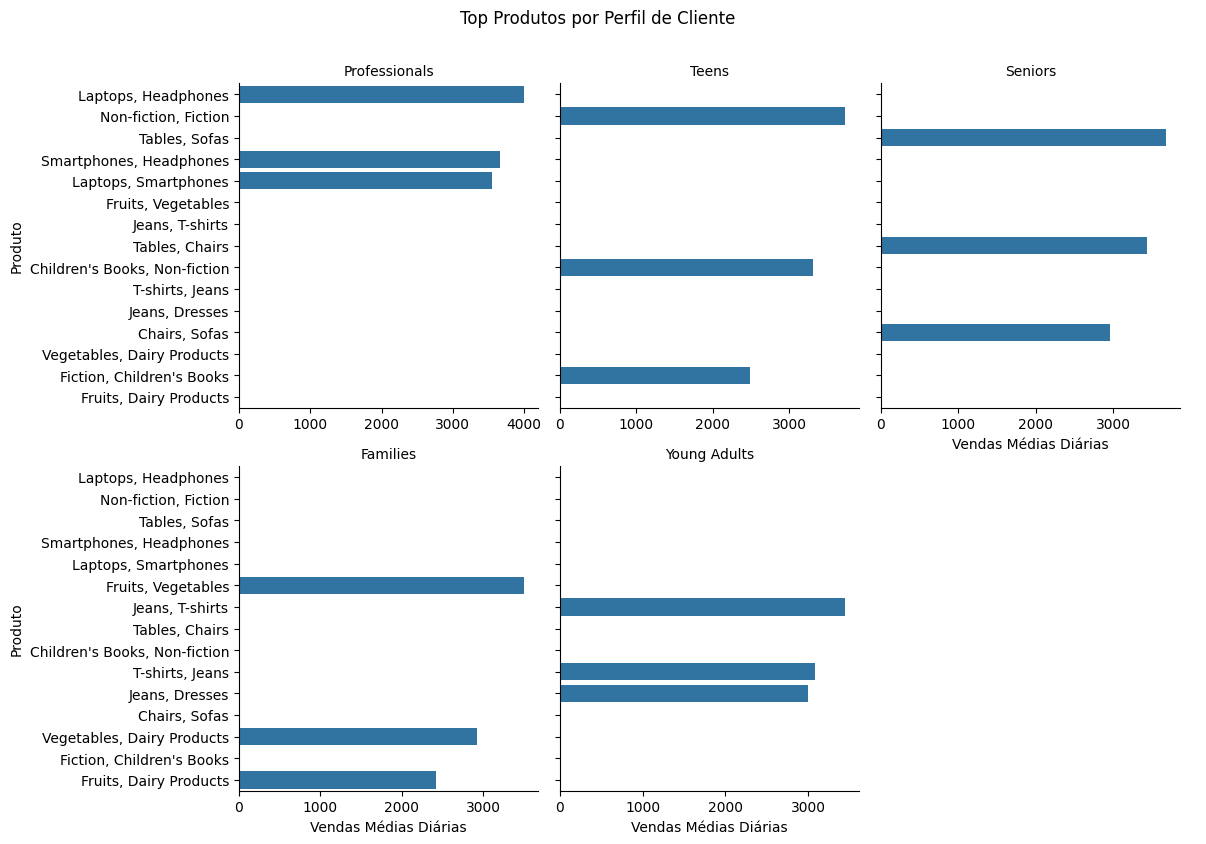

In [28]:
# Gráfico B

g = sns.catplot(data=top_produtos_perfil, x='vendas_medias_diarias', y='produtos_populares', col='perfil_clientes', kind='bar', col_wrap=3, height=4, sharex=False)

g.set_titles('{col_name}')
g.set_axis_labels('Vendas Médias Diárias', 'Produto')
g.fig.suptitle('Top Produtos por Perfil de Cliente', y=1.05)
plt.show()


In [29]:
# Verificando valores únicos de df_clima

df_clima['cluster_chuva_mm'].unique()

array(['seco', 'moderada', 'extrema', 'forte'], dtype=object)

In [30]:
# Cidades com maior porcentagem de dias secos, têm lojas com maior venda diária?


# Calcular total de dias por localidade
total_dias = (df_clima.groupby('localidade').size().rename('total_dias'))

# Dias secos por localidade // cidade
dias_secos = (df_clima[df_clima['cluster_chuva_mm'] == 'seco'].groupby('localidade').size().rename('dias_secos'))

# Merge // join dos dados - juntando total + dias secos
clima_seco = total_dias.to_frame().join(dias_secos, how='left')
clima_seco['dias_secos'] = clima_seco['dias_secos'].fillna(0)

# % dias secos
clima_seco['porcentagem_dias_secos'] = clima_seco['dias_secos'] / clima_seco['total_dias']


# Usando retail por localidade
vendas_por_cidade = df_retail.groupby('localidade')['vendas_medias_diarias'].mean().rename('vendas_medias_diarias_por_loja')

# Clima e Vendas
analise1 = clima_seco.join(vendas_por_cidade, how='left').round(2)
display(analise1)

,total_dias,dias_secos,porcentagem_dias_secos,vendas_medias_diarias_por_loja
localidade,,,,
Adelaide,2746,2270,0.83,2505.73
Brisbane,3029,2484,0.82,2898.42
Melbourne,2240,1821,0.81,2687.14
Perth,3049,2541,0.83,2459.98
Sydney,2285,1774,0.78,3068.43


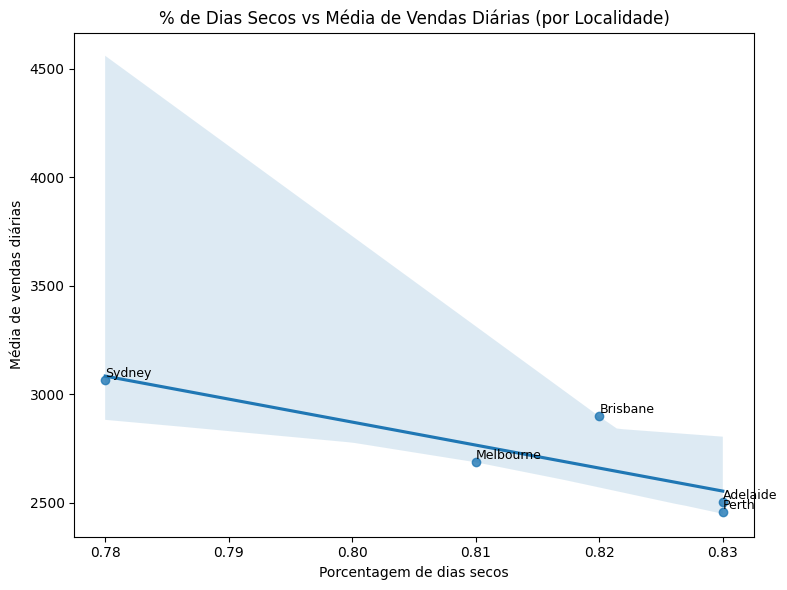

In [31]:
# Gráfico

# garantir dataframe com colunas
plot_df = analise1.reset_index()  # traz 'localidade' como coluna

plt.figure(figsize=(8, 6))
sns.regplot(data=plot_df, x='porcentagem_dias_secos', y='vendas_medias_diarias_por_loja')

plt.title('% de Dias Secos vs Média de Vendas Diárias (por Localidade)')
plt.xlabel('Porcentagem de dias secos')
plt.ylabel('Média de vendas diárias')

# rótulos das cidades (útil porque são poucos pontos)
for _, row in plot_df.iterrows():
    plt.text(row['porcentagem_dias_secos'], row['vendas_medias_diarias_por_loja'], str(row['localidade']), fontsize=9, ha='left', va='bottom')

plt.tight_layout()
plt.show()

In [32]:
# Cidades com maior porcentagem de dias secos, têm lojas com maior venda diária?


# Calcular total de dias por localidade
total_dias = (df_clima.groupby('localidade').size().rename('total_dias'))

# Dias secos por localidade // cidade
dias_moderados = (df_clima[df_clima['cluster_chuva_mm'] == 'moderada'].groupby('localidade').size().rename('dias_moderados'))

# Merge // join dos dados - juntando total + dias secos
clima_moderado = total_dias.to_frame().join(dias_moderados, how='left')
clima_moderado['dias_moderados'] = clima_moderado['dias_moderados'].fillna(0)

# % dias secos
clima_moderado['porcentagem_dias_moderados'] = clima_moderado['dias_moderados'] / clima_moderado['total_dias'] * 100

# Usando retail por localidade
vendas_por_cidade = df_retail.groupby('localidade')['vendas_medias_diarias'].mean().rename('vendas_medias_diarias_por_loja')

# Clima e Vendas
analise2 = clima_moderado.join(vendas_por_cidade, how='left').round(2)
display(analise2)

,total_dias,dias_moderados,porcentagem_dias_moderados,vendas_medias_diarias_por_loja
localidade,,,,
Adelaide,2746,350,12.75,2505.73
Brisbane,3029,309,10.20,2898.42
Melbourne,2240,306,13.66,2687.14
Perth,3049,323,10.59,2459.98
Sydney,2285,292,12.78,3068.43


In [33]:
# Cidades com maior porcentagem de dias secos, têm lojas com maior venda diária?


# Calcular total de dias por localidade
total_dias = (df_clima.groupby('localidade').size().rename('total_dias'))

# Dias secos por localidade // cidade
dias_fortes = (df_clima[df_clima['cluster_chuva_mm'] == 'Forte'].groupby('localidade').size().rename('dias_fortes'))

# Merge // join dos dados - juntando total + dias secos
clima_forte = total_dias.to_frame().join(dias_fortes, how='left')
clima_forte['dias_fortes'] = clima_forte['dias_fortes'].fillna(0)

# % dias secos
clima_forte['porcentagem_dias_fortes'] = clima_forte['dias_fortes'] / clima_forte['total_dias'] * 100


# Usando retail por localidade
vendas_por_cidade = df_retail.groupby('localidade')['vendas_medias_diarias'].mean().rename('vendas_medias_diarias_por_loja')

# Clima e Vendas
analise3 = clima_forte.join(vendas_por_cidade, how='left').round(2)
display(analise3)

,total_dias,dias_fortes,porcentagem_dias_fortes,vendas_medias_diarias_por_loja
localidade,,,,
Adelaide,2746,0.0,0.0,2505.73
Brisbane,3029,0.0,0.0,2898.42
Melbourne,2240,0.0,0.0,2687.14
Perth,3049,0.0,0.0,2459.98
Sydney,2285,0.0,0.0,3068.43


In [34]:
# Cidades com maior porcentagem de dias secos, têm lojas com maior venda diária?


# Calcular total de dias por localidade
total_dias = (df_clima.groupby('localidade').size().rename('total_dias'))

# Dias secos por localidade // cidade
dias_extremos = (df_clima[df_clima['cluster_chuva_mm'] == 'extrema'].groupby('localidade').size().rename('dias_extremas'))

# Merge // join dos dados - juntando total + dias secos
clima_extremo = total_dias.to_frame().join(dias_extremos, how='left')
clima_extremo['dias_extremas'] = clima_extremo['dias_extremas'].fillna(0)

# % dias secos
clima_extremo['porcentagem_dias_extremos'] = clima_extremo['dias_extremas'] / clima_forte['total_dias'] * 100


# Usando retail por localidade
vendas_por_cidade = df_retail.groupby('localidade')['vendas_medias_diarias'].mean().rename('vendas_medias_diarias_por_loja')

# Clima e Vendas
analise4 = clima_extremo.join(vendas_por_cidade, how='left').round(2)
display(analise4)

"""
analise4_cor_teste = analise4.corr().round(2)
display(analise4_cor_teste)
"""

,total_dias,dias_extremas,porcentagem_dias_extremos,vendas_medias_diarias_por_loja
localidade,,,,
Adelaide,2746,13,0.47,2505.73
Brisbane,3029,74,2.44,2898.42
Melbourne,2240,15,0.67,2687.14
Perth,3049,26,0.85,2459.98
Sydney,2285,64,2.80,3068.43


'\nanalise4_cor_teste = analise4.corr().round(2)\ndisplay(analise4_cor_teste)\n'

In [35]:
"""df_clima['cluster_chuva_mm'].value_counts(dropna=False),
plot_df[['%_dias_chuva_forte']].isna().sum()
plot_df[['%_dias_chuva_forte']].describe()"""

"df_clima['cluster_chuva_mm'].value_counts(dropna=False),\nplot_df[['%_dias_chuva_forte']].isna().sum()\nplot_df[['%_dias_chuva_forte']].describe()"

In [36]:
# Chuva vs vendas médias diárias - Existe influencia?

# Normalizando cabeçalho coluna
#df_clima['cluster_chuva_mm'] = df_clima['cluster_chuva_mm'].astype(str).str.strip().str.lower()

# Calcular total de dias por localidade
total_dias = (df_clima.groupby('localidade').size().rename('total_dias'))

# Chuvas por localidade // cidade
dias_sem_chuva = (df_clima[df_clima['cluster_chuva_mm'] == 'seco'].groupby('localidade').size().rename('dias_sem_chuva'))
dias_chuva_moderada = (df_clima[df_clima['cluster_chuva_mm'] == 'moderada'].groupby('localidade').size().rename('dias_chuva_moderada'))
dias_chuva_forte = (df_clima[df_clima['cluster_chuva_mm'] == 'forte'].groupby('localidade').size().rename('dias_chuva_forte'))
dias_chuva_extrema = (df_clima[df_clima['cluster_chuva_mm'] == 'extrema'].groupby('localidade').size().rename('dias_chuva_extrema'))

# Merge // join dos dados
dias_chuva = [dias_sem_chuva, dias_chuva_moderada, dias_chuva_forte, dias_chuva_extrema]
clima_analise = total_dias.to_frame().join(dias_chuva, how='left')

# Tratando possíveis NaN
#dias_chuva[clima_analise] = dias_chuva[dias_sem_chuva, dias_chuva_moderada, dias_chuva_forte, dias_chuva_extrema].fillna(0)

# Porcentagem chuva dias
clima_analise['%_dias_sem_chuva'] = (clima_analise['dias_sem_chuva'] / clima_analise['total_dias'] * 100)
clima_analise['%_dias_chuva_moderada'] = (clima_analise['dias_chuva_moderada'] / clima_analise['total_dias'] * 100)
clima_analise['%_dias_chuva_forte'] = (clima_analise['dias_chuva_forte'] / clima_analise['total_dias'] * 100)
clima_analise['%_dias_chuva_extrema'] = (clima_analise['dias_chuva_extrema'] / clima_analise['total_dias'] * 100)

# Agrupando vendas médias diárias por cidade
vendas_por_cidade = (df_retail.groupby('localidade')['vendas_medias_diarias'].mean().rename('vendas_medias_diarias_por_loja'))

# Merge // join dos dados de retail e clima
analise_final_chuva_vendas_diarias = clima_analise.join(vendas_por_cidade, how='left')

# Imprime
display(analise_final_chuva_vendas_diarias.round(2).sort_values(by='vendas_medias_diarias_por_loja', ascending=False))


,total_dias,dias_sem_chuva,dias_chuva_moderada,dias_chuva_forte,dias_chuva_extrema,%_dias_sem_chuva,%_dias_chuva_moderada,%_dias_chuva_forte,%_dias_chuva_extrema,vendas_medias_diarias_por_loja
localidade,,,,,,,,,,
Sydney,2285,1774,292,155,64,77.64,12.78,6.78,2.80,3068.43
Brisbane,3029,2484,309,162,74,82.01,10.20,5.35,2.44,2898.42
Melbourne,2240,1821,306,98,15,81.29,13.66,4.38,0.67,2687.14
Adelaide,2746,2270,350,113,13,82.67,12.75,4.12,0.47,2505.73
Perth,3049,2541,323,159,26,83.34,10.59,5.21,0.85,2459.98


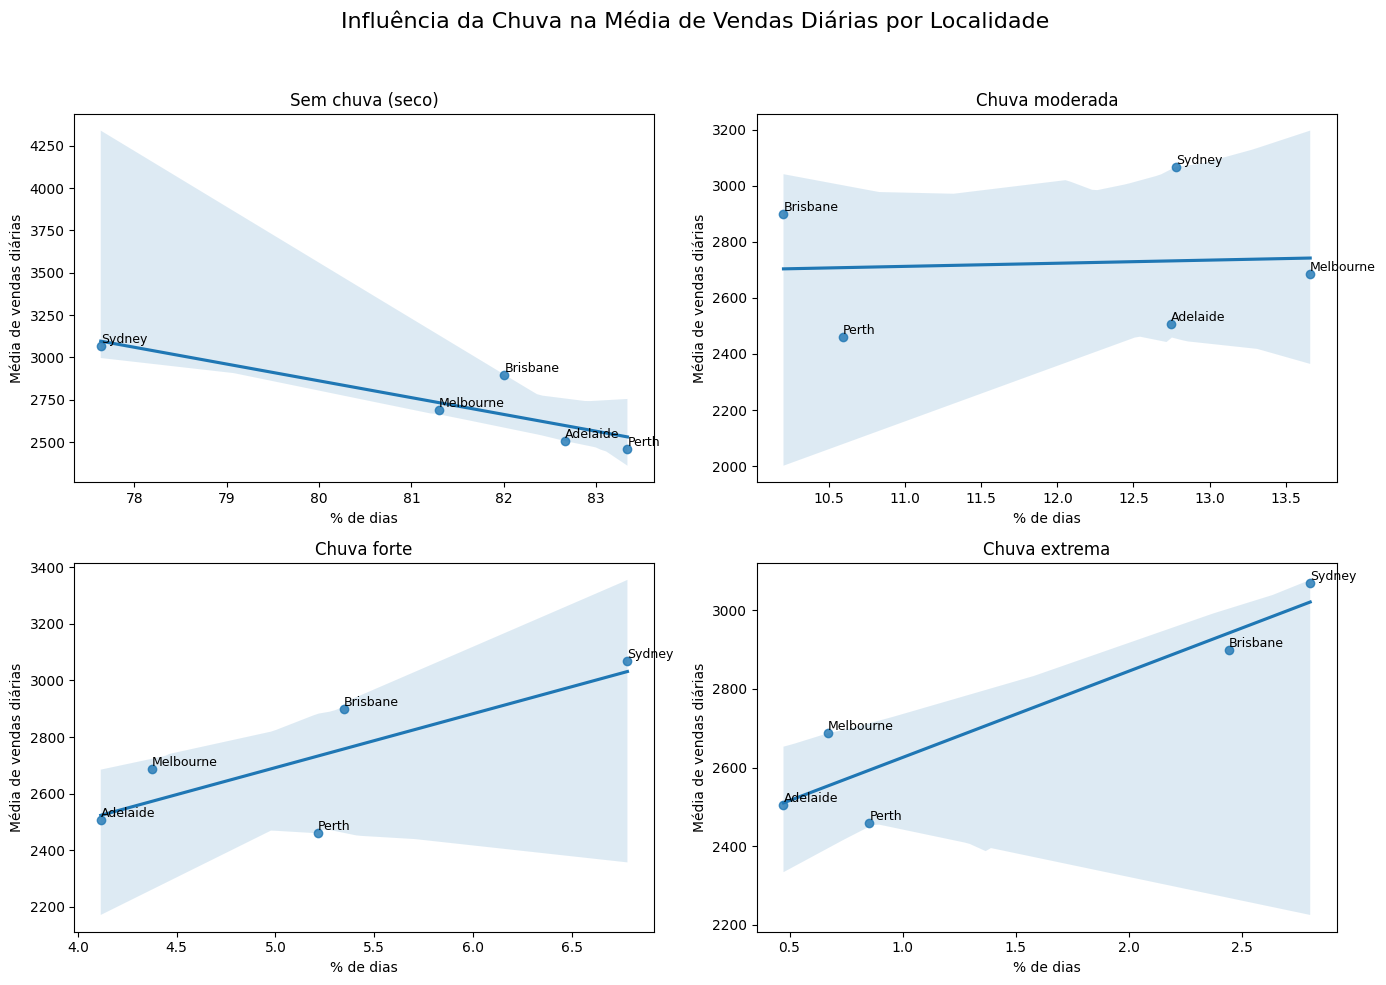

In [37]:
# Gráfico

plot_df = analise_final_chuva_vendas_diarias.reset_index()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

pares = [
    ('%_dias_sem_chuva', 'Sem chuva (seco)'),
    ('%_dias_chuva_moderada', 'Chuva moderada'),
    ('%_dias_chuva_forte', 'Chuva forte'),
    ('%_dias_chuva_extrema', 'Chuva extrema'),
]

for ax, (col, titulo) in zip(axes, pares):
    sns.regplot(data=plot_df, x=col, y='vendas_medias_diarias_por_loja', ax=ax)

    ax.set_title(titulo)
    ax.set_xlabel('% de dias')
    ax.set_ylabel('Média de vendas diárias')

    # rótulos das cidades (como são poucos pontos, vale a pena)
    for _, row in plot_df.iterrows():
        ax.text(row[col], row['vendas_medias_diarias_por_loja'], str(row['localidade']), fontsize=9, ha='left', va='bottom')

plt.suptitle('Influência da Chuva na Média de Vendas Diárias por Localidade', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [38]:
# Separando números de porcentagem
analise_final_chuva_vendas_diarias_num = analise_final_chuva_vendas_diarias[['total_dias', 'dias_sem_chuva', 'dias_chuva_moderada', 'dias_chuva_forte', 'dias_chuva_extrema', 'vendas_medias_diarias_por_loja']]
display(analise_final_chuva_vendas_diarias_num.round(2).sort_values(by='vendas_medias_diarias_por_loja', ascending=False))

,total_dias,dias_sem_chuva,dias_chuva_moderada,dias_chuva_forte,dias_chuva_extrema,vendas_medias_diarias_por_loja
localidade,,,,,,
Sydney,2285,1774,292,155,64,3068.43
Brisbane,3029,2484,309,162,74,2898.42
Melbourne,2240,1821,306,98,15,2687.14
Adelaide,2746,2270,350,113,13,2505.73
Perth,3049,2541,323,159,26,2459.98


In [39]:
# Separando porcentagem dos números
analise_final_chuva_vendas_diarias_pct = analise_final_chuva_vendas_diarias[['total_dias', '%_dias_sem_chuva', '%_dias_chuva_moderada', '%_dias_chuva_forte', '%_dias_chuva_extrema', 'vendas_medias_diarias_por_loja']]
display(analise_final_chuva_vendas_diarias_pct.round(2).sort_values(by='vendas_medias_diarias_por_loja', ascending=False))

,total_dias,%_dias_sem_chuva,%_dias_chuva_moderada,%_dias_chuva_forte,%_dias_chuva_extrema,vendas_medias_diarias_por_loja
localidade,,,,,,
Sydney,2285,77.64,12.78,6.78,2.80,3068.43
Brisbane,3029,82.01,10.20,5.35,2.44,2898.42
Melbourne,2240,81.29,13.66,4.38,0.67,2687.14
Adelaide,2746,82.67,12.75,4.12,0.47,2505.73
Perth,3049,83.34,10.59,5.21,0.85,2459.98


In [40]:
# Aplicando correlação
display(analise_final_chuva_vendas_diarias_pct.corr().round(2))

,total_dias,%_dias_sem_chuva,%_dias_chuva_moderada,%_dias_chuva_forte,%_dias_chuva_extrema,vendas_medias_diarias_por_loja
total_dias,1.00,0.73,-0.90,-0.17,-0.08,-0.42
%_dias_sem_chuva,0.73,1.00,-0.44,-0.76,-0.70,-0.86
%_dias_chuva_moderada,-0.90,-0.44,1.00,-0.20,-0.29,0.07
%_dias_chuva_forte,-0.17,-0.76,-0.20,1.00,0.87,0.77
%_dias_chuva_extrema,-0.08,-0.70,-0.29,0.87,1.00,0.92
vendas_medias_diarias_por_loja,-0.42,-0.86,0.07,0.77,0.92,1.00


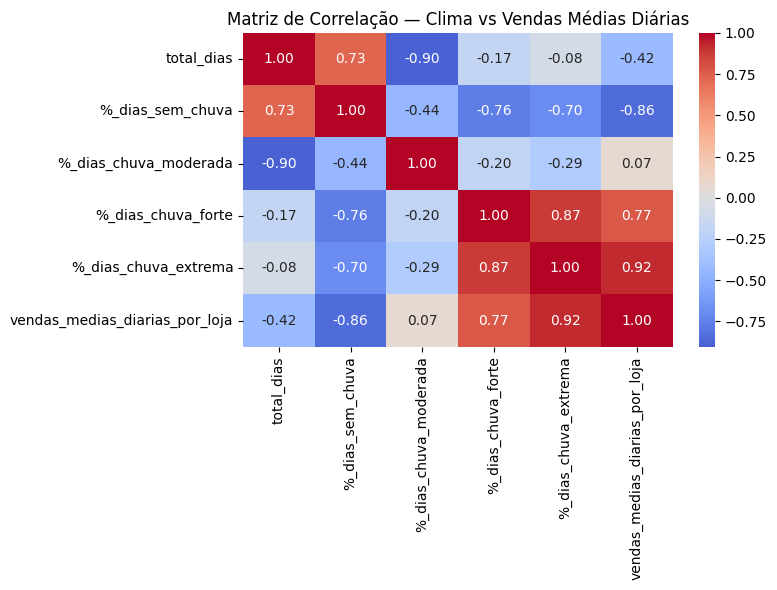

In [41]:
corr = analise_final_chuva_vendas_diarias_pct.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)

plt.title('Matriz de Correlação — Clima vs Vendas Médias Diárias')
plt.tight_layout()
plt.show()

In [42]:
"""
analise_chuva_vd_num_corr = analise_final_chuva_vendas_diarias_num.corr()
display(analise_chuva_vd_num_corr.round(2)) 
"""
display(df_clima)

,data,localidade,temp_min,temp_max,chuva_mm,evaporacao,horas_sol,vento_rajada_direcao,vento_rajada_velocidade,vento_direcao_9h,...,cluster_temp_9h,cluster_temp_15h,cluster_umidade_9h,cluster_umidade_15h,cluster_chuva_mm,cluster_rajada_vento,cluster_hora_sol,cluster_pressao_at_9h,cluster_pressao_at_15h,cluster_nuvem_9h
0,2010-10-08,Sydney,13.8,19.5,0.0,4.6,9.5,ESE,35.0,NNE,...,ameno,ameno,tropical,ameno,seco,moderado,muitas horas de sol,normal,normal,parcialmente nublado
1,2010-10-11,Sydney,16.5,21.1,1.2,6.2,6.6,ENE,56.0,NE,...,ameno,quente,ameno,ameno,seco,forte,médias horas de sol,normal,normal,parcialmente nublado
2,2010-10-12,Sydney,16.4,21.8,1.0,6.0,5.9,NNE,50.0,NNE,...,ameno,quente,tropical,ameno,seco,forte,médias horas de sol,normal,normal,parcialmente nublado
3,2010-10-13,Sydney,16.7,23.9,0.4,7.0,2.8,NNE,39.0,W,...,ameno,quente,tropical,ameno,seco,moderado,poucas horas de sol,normal,normal,parcialmente nublado
4,2010-10-14,Sydney,17.8,28.9,2.0,4.0,10.8,NNW,41.0,NNW,...,quente,quente,ameno,ameno,seco,forte,muitas horas de sol,normal,baixa,parcialmente nublado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13344,2017-06-21,Perth,10.3,19.9,0.2,1.8,7.5,NW,37.0,NNE,...,ameno,ameno,tropical,ameno,seco,moderado,médias horas de sol,normal,normal,parcialmente nublado
13345,2017-06-22,Perth,13.0,16.8,61.2,3.6,0.0,SSW,46.0,W,...,ameno,ameno,tropical,tropical,extrema,forte,poucas horas de sol,baixa,baixa,parcialmente nublado
13346,2017-06-23,Perth,13.3,18.9,0.4,1.8,6.5,SE,37.0,SE,...,ameno,ameno,tropical,ameno,seco,moderado,médias horas de sol,alta,alta,parcialmente nublado
13347,2017-06-24,Perth,11.5,18.2,0.0,3.8,9.3,SE,30.0,ESE,...,ameno,ameno,ameno,ameno,seco,moderado,muitas horas de sol,alta,alta,parcialmente nublado


In [43]:
# Horas Sol vs vendas médias diárias - Existe influencia?

# Horas sol // cidade

# var recebe = df_clima onde filtrado por df_clima coluna cluster_hora_sol = texto filtrado // agrupa por localidade // conta o número de linhas (tamanho) da localidade e renomeia para min_hora_sol
min_horas_sol = (df_clima[df_clima['cluster_hora_sol'] == 'poucas horas de sol'].groupby('localidade').size().rename('min_hora_sol'))
med_horas_sol = (df_clima[df_clima['cluster_hora_sol'] == 'médias horas de sol'].groupby('localidade').size().rename('med_hora_sol'))
max_horas_sol = (df_clima[df_clima['cluster_hora_sol'] == 'muitas horas de sol'].groupby('localidade').size().rename('max_hora_sol'))


# Merge // join dos dados
horas_sol = [min_horas_sol, med_horas_sol, max_horas_sol]
horas_sol_analise = total_dias.to_frame().join(horas_sol, how='left')

# Porcentagem horas sol
horas_sol_analise['%_min_horas_sol'] = (horas_sol_analise['min_hora_sol'] / horas_sol_analise['total_dias'] * 100)
horas_sol_analise['%_med_horas_sol'] = (horas_sol_analise['med_hora_sol'] / horas_sol_analise['total_dias'] * 100)
horas_sol_analise['%_max_horas_sol'] = (horas_sol_analise['max_hora_sol'] / horas_sol_analise['total_dias'] * 100)


# Agrupando vendas médias diárias por cidade
vendas_por_cidade = (df_retail.groupby('localidade')['vendas_medias_diarias'].mean().rename('vendas_medias_diarias_por_loja'))

# Merge // join dos dados de retail e clima
analise_final_horas_sol_vendas_diarias = horas_sol_analise.join(vendas_por_cidade, how='left')

# Imprime
display(analise_final_horas_sol_vendas_diarias.round(2).sort_values(by='vendas_medias_diarias_por_loja', ascending=False))


,total_dias,min_hora_sol,med_hora_sol,max_hora_sol,%_min_horas_sol,%_med_horas_sol,%_max_horas_sol,vendas_medias_diarias_por_loja
localidade,,,,,,,,
Sydney,2285,618,747,920,27.05,32.69,40.26,3068.43
Brisbane,3029,548,904,1577,18.09,29.84,52.06,2898.42
Melbourne,2240,741,853,646,33.08,38.08,28.84,2687.14
Adelaide,2746,387,1706,653,14.09,62.13,23.78,2505.73
Perth,3049,425,976,1648,13.94,32.01,54.05,2459.98


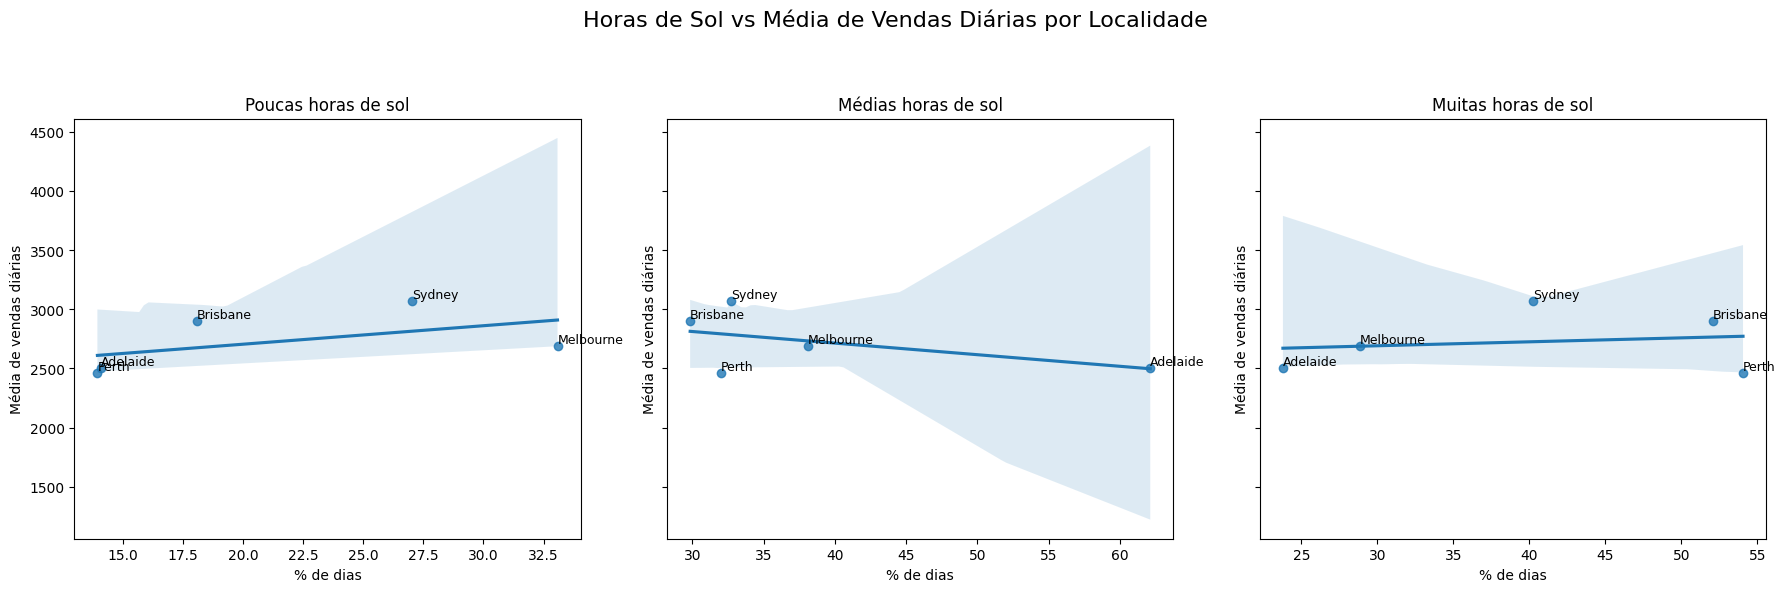

In [44]:
# Gráfico

plot_df = analise_final_horas_sol_vendas_diarias.reset_index()

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

pares = [
    ('%_min_horas_sol', 'Poucas horas de sol'),
    ('%_med_horas_sol', 'Médias horas de sol'),
    ('%_max_horas_sol', 'Muitas horas de sol'),
]

for ax, (col, titulo) in zip(axes, pares):
    sns.regplot(
        data=plot_df,
        x=col,
        y='vendas_medias_diarias_por_loja',
        ax=ax
    )

    ax.set_title(titulo)
    ax.set_xlabel('% de dias')
    ax.set_ylabel('Média de vendas diárias')

    # rótulos das cidades
    for _, row in plot_df.iterrows():
        ax.text(
            row[col],
            row['vendas_medias_diarias_por_loja'],
            str(row['localidade']),
            fontsize=9,
            ha='left',
            va='bottom'
        )

plt.suptitle('Horas de Sol vs Média de Vendas Diárias por Localidade', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


In [45]:
# Separando colunas %
analise_final_horas_sol_vendas_diarias_pct = analise_final_horas_sol_vendas_diarias[["total_dias", "%_min_horas_sol", "%_med_horas_sol", "%_max_horas_sol", "vendas_medias_diarias_por_loja"]]
display(analise_final_horas_sol_vendas_diarias_pct.round(2).sort_values(by='vendas_medias_diarias_por_loja', ascending=False))

,total_dias,%_min_horas_sol,%_med_horas_sol,%_max_horas_sol,vendas_medias_diarias_por_loja
localidade,,,,,
Sydney,2285,27.05,32.69,40.26,3068.43
Brisbane,3029,18.09,29.84,52.06,2898.42
Melbourne,2240,33.08,38.08,28.84,2687.14
Adelaide,2746,14.09,62.13,23.78,2505.73
Perth,3049,13.94,32.01,54.05,2459.98


In [46]:
# Aplicando correlação
display(analise_final_horas_sol_vendas_diarias_pct.corr().round(2))

,total_dias,%_min_horas_sol,%_med_horas_sol,%_max_horas_sol,vendas_medias_diarias_por_loja
total_dias,1.00,-0.89,-0.07,0.62,-0.42
%_min_horas_sol,-0.89,1.00,-0.29,-0.34,0.51
%_med_horas_sol,-0.07,-0.29,1.00,-0.80,-0.50
%_max_horas_sol,0.62,-0.34,-0.80,1.00,0.17
vendas_medias_diarias_por_loja,-0.42,0.51,-0.50,0.17,1.00


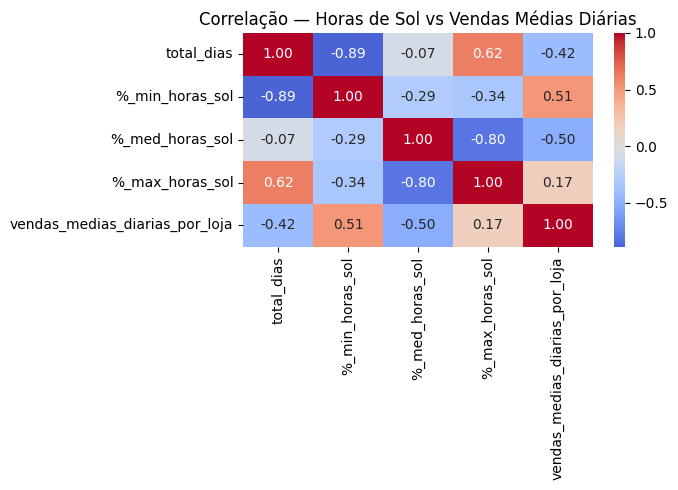

In [52]:
# Gráfico

corr2 = analise_final_horas_sol_vendas_diarias_pct.corr()

plt.figure(figsize=(7, 5))
sns.heatmap(corr2, annot=True, fmt='.2f', center=0, cmap='coolwarm')

plt.title('Correlação — Horas de Sol vs Vendas Médias Diárias')
plt.tight_layout()
plt.show()

In [48]:
display(df_clima), display(df_retail)

,data,localidade,temp_min,temp_max,chuva_mm,evaporacao,horas_sol,vento_rajada_direcao,vento_rajada_velocidade,vento_direcao_9h,...,cluster_temp_9h,cluster_temp_15h,cluster_umidade_9h,cluster_umidade_15h,cluster_chuva_mm,cluster_rajada_vento,cluster_hora_sol,cluster_pressao_at_9h,cluster_pressao_at_15h,cluster_nuvem_9h
0,2010-10-08,Sydney,13.8,19.5,0.0,4.6,9.5,ESE,35.0,NNE,...,ameno,ameno,tropical,ameno,seco,moderado,muitas horas de sol,normal,normal,parcialmente nublado
1,2010-10-11,Sydney,16.5,21.1,1.2,6.2,6.6,ENE,56.0,NE,...,ameno,quente,ameno,ameno,seco,forte,médias horas de sol,normal,normal,parcialmente nublado
2,2010-10-12,Sydney,16.4,21.8,1.0,6.0,5.9,NNE,50.0,NNE,...,ameno,quente,tropical,ameno,seco,forte,médias horas de sol,normal,normal,parcialmente nublado
3,2010-10-13,Sydney,16.7,23.9,0.4,7.0,2.8,NNE,39.0,W,...,ameno,quente,tropical,ameno,seco,moderado,poucas horas de sol,normal,normal,parcialmente nublado
4,2010-10-14,Sydney,17.8,28.9,2.0,4.0,10.8,NNW,41.0,NNW,...,quente,quente,ameno,ameno,seco,forte,muitas horas de sol,normal,baixa,parcialmente nublado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13344,2017-06-21,Perth,10.3,19.9,0.2,1.8,7.5,NW,37.0,NNE,...,ameno,ameno,tropical,ameno,seco,moderado,médias horas de sol,normal,normal,parcialmente nublado
13345,2017-06-22,Perth,13.0,16.8,61.2,3.6,0.0,SSW,46.0,W,...,ameno,ameno,tropical,tropical,extrema,forte,poucas horas de sol,baixa,baixa,parcialmente nublado
13346,2017-06-23,Perth,13.3,18.9,0.4,1.8,6.5,SE,37.0,SE,...,ameno,ameno,tropical,ameno,seco,moderado,médias horas de sol,alta,alta,parcialmente nublado
13347,2017-06-24,Perth,11.5,18.2,0.0,3.8,9.3,SE,30.0,ESE,...,ameno,ameno,ameno,ameno,seco,moderado,muitas horas de sol,alta,alta,parcialmente nublado


,tipo_negocio,loja_negocio,localidade,horario_abertura,horario_fechamento,horario_maior_fluxo,horario_pico_vendas,alocacao_funcionarios,horario_pico_vendas_2,vendas_medias_diarias,vendas_medias_semanais,produtos_populares,perfil_clientes,metodos_pagamento,satisfacao_clientes,lucratividade_loja,satisfacao_funcionarios,reclamacoes_trabalhistas
0,Clothing,Fashion Hub,Melbourne,09:00:00,20:00:00,19:00:00,16:00:00,Overstaffed,20:00:00,3520.77,23527.26,"T-shirts, Jeans",Young Adults,Credit Card,Good,Decreased,Dissatisfied,Yes
1,Bookstore,Book Nook,Brisbane,09:00:00,22:00:00,14:00:00,18:00:00,Understaffed,17:00:00,2915.36,27744.20,"Children's Books, Non-fiction",Teens,Credit Card,Good,Decreased,Dissatisfied,Yes
2,Bookstore,Book Nook,Adelaide,08:00:00,21:00:00,16:00:00,19:00:00,Overstaffed,18:00:00,1984.46,22411.88,"Non-fiction, Children's Books",Teens,Credit Card,Bad,Decreased,Satisfied,No
3,Bookstore,Book Nook,Melbourne,09:00:00,18:00:00,18:00:00,19:00:00,Overstaffed,19:00:00,644.22,31314.84,"Fiction, Non-fiction",Teens,Digital Wallet,Bad,Decreased,Dissatisfied,Yes
4,Furniture,Home Essentials,Sydney,07:00:00,20:00:00,15:00:00,21:00:00,Understaffed,18:00:00,620.63,27881.23,"Chairs, Sofas",Seniors,Cash,Good,Increased,Satisfied,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Clothing,Fashion Hub,Melbourne,07:00:00,20:00:00,18:00:00,17:00:00,Overstaffed,20:00:00,507.56,5081.61,"Dresses, Jeans",Young Adults,Digital Wallet,Good,Increased,Satisfied,No
496,Grocery,Green Grocers,Sydney,08:00:00,18:00:00,11:00:00,17:00:00,Understaffed,17:00:00,3618.03,29709.42,"Vegetables, Dairy Products",Families,Debit Card,Bad,Increased,Satisfied,Yes
497,Clothing,Fashion Hub,Perth,07:00:00,21:00:00,12:00:00,20:00:00,Overstaffed,20:00:00,1569.51,9908.53,"Dresses, Jeans",Young Adults,Digital Wallet,Good,Increased,Dissatisfied,No
498,Clothing,Fashion Hub,Sydney,08:00:00,19:00:00,20:00:00,17:00:00,Understaffed,19:00:00,1411.71,33851.77,"T-shirts, Jeans",Young Adults,Credit Card,Good,Increased,Dissatisfied,Yes


(None, None)

In [49]:
df_retail.describe()

,vendas_medias_diarias,vendas_medias_semanais
count,500.000000,500.000000
mean,2748.050040,21274.825640
std,1163.109471,9397.319614
min,494.540000,3865.030000
25%,1868.622500,13966.630000
50%,2785.035000,23320.345000
75%,3698.420000,29865.052500
max,5199.460000,37754.760000
